#Atividade Prática - Clusterização

**Prof: Hugo Bastos de Paula**

**Aluno: Alyssonn Rodrigo Alves**

Uma operadora de seguro de saúde sabe da forte influência do peso, gênero e nível de colesterol no desenvolvimento de doenças cardíacas. O objetivo dessa atividade é identificar perfis de indivíduos com maior risco para sobrepeso e colesterol alto.

Para alcançar este objetivo, iremos utilizar o modelo agrupamento pelo algoritmo das K-Means. Então nosso objetivo se torna encontrar grupos de indivíduos (clusters) e definir os limites entre o grupo saudável e o grupo de risco.

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn import metrics 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from time import time
from sklearn.pipeline import make_pipeline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Atividade 6 - Saude.xlsx to Atividade 6 - Saude.xlsx


**Análise descritiva da base de dados**

In [3]:
saude = pd.read_excel('Atividade 6 - Saude.xlsx', sheet_name=0)
print("\nDimensões:\n{0}\n".format(saude.shape))
print("\nCampos:\n{0}\n".format(list(saude.keys())))
print("\nTipos dos dados:\n")
format(saude.info())
print(saude.describe().to_string(max_cols=saude.shape[1]), sep='\n')


Dimensões:
(547, 3)


Campos:
['Peso', 'Colesterol', 'Genero']


Tipos dos dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Peso        547 non-null    int64
 1   Colesterol  547 non-null    int64
 2   Genero      547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB
             Peso  Colesterol      Genero
count  547.000000  547.000000  547.000000
mean   143.572212  170.433272    0.513711
std     30.837275   39.147189    0.500269
min     95.000000  102.000000    0.000000
25%    116.000000  136.000000    0.000000
50%    140.000000  169.000000    1.000000
75%    171.000000  208.000000    1.000000
max    203.000000  235.000000    1.000000


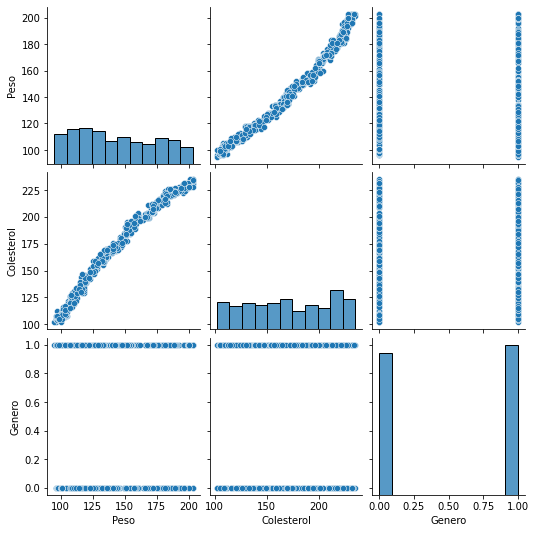

In [4]:
sns.pairplot(saude)

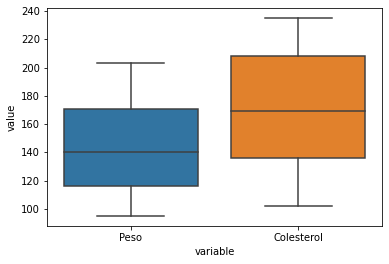

In [6]:
plot_saude = saude[['Peso', 'Colesterol']]
sns.boxplot(data=pd.melt(plot_saude), x='variable', y='value')

**Normalização da base**

In [9]:
X = MinMaxScaler().fit_transform(saude)
X = saude.iloc[:,0:(saude.shape[1] - 1)]
le = LabelEncoder()
y = le.fit_transform(saude.iloc[:,(saude.shape[1] - 1)])
class_names = le.classes_

**Aplicação da K-means**

In [10]:
def bench_k_means(kmeans, name, data, labels):
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(saude)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Mostra os resultados
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

Utilizando a K-means, realize a clustrização com k=2. Tende descrever os dois grupos gerados. Utilize as informações dos centroides dos clusteres para tentar diferenciar os dois grupos de risco.

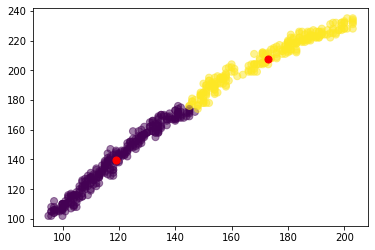

[[119.0738255  139.34899329   0.47986577]
 [172.89156627 207.63453815   0.55421687]]
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.017s	494	0.657	0.417	0.510	0.429	0.509	0.230
random   	0.011s	527	0.576	0.371	0.451	0.332	0.450	0.280
PCA-based	0.007s	494	0.657	0.417	0.510	0.429	0.509	0.266


In [18]:
kmeans = KMeans (n_clusters= 2).fit(saude)
centroids = kmeans.cluster_centers_

plt.scatter(saude['Peso'], saude["Colesterol"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

print(centroids)

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=3, n_init=2,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=saude, labels=y)

kmeans = KMeans(init="random", n_clusters=3, n_init=2, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=saude, labels=y)

pca = PCA(n_components=3).fit(saude)
kmeans = KMeans(init=pca.components_, n_clusters=3, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=saude, labels=y)

Acima conseguimos observar que o cluster em roxo representa o grupo de baixo peso e baixo colesterol indicando assim o grupo de pessoas saudáveis e o cluster amarelo representa o grupo de alto pese e alto colesterol indicando assim o grupo de risco

In [29]:
X_scaled = StandardScaler().fit_transform(saude)
n_samples = X.shape[0]
X_arr = np.array(saude)

In [30]:
X = X_arr

estimator = KMeans(n_clusters=2, random_state=None)

model = estimator.fit(X)

y_pred = estimator.predict(X)

Vamos tentar encontrar 4 grupos distintos: alto risco possui colesterol e peso altos; baixo risco possui colesterol e peso baixos; e risco moderado possui apenas o peso ou apenas o colesterol altos. Verifique os resultados. Investigue a tabela de centroides e a visão dos dados, além dos gráficos. Defina quais são os limites de peso e de colesterol para que um indivíduo seja considerado paciente de risco.

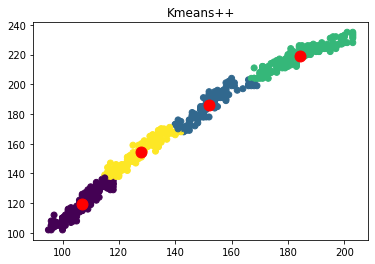

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.00s	81475	1.000	1.000	1.000	1.000	1.000	0.571
Centroids [[106.85       119.53571429   0.54285714]
 [152.09322034 185.90677966   0.44067797]
 [184.31818182 218.91558442   0.59090909]
 [127.72592593 154.38518519   0.45925926]]


In [34]:
estimator = KMeans(n_clusters=4, random_state=None, init='k-means++', max_iter=300)
y_pred = estimator.fit_predict(X)

centroids = estimator.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], s=120, c='red', label = 'Centroids')

plt.title("Kmeans++")
plt.show()

labels = estimator.labels_

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
      % ('k-means++', 0, estimator.inertia_,
              metrics.homogeneity_score(labels, estimator.labels_),
              metrics.completeness_score(labels, estimator.labels_),
              metrics.v_measure_score(labels, estimator.labels_),
              metrics.adjusted_rand_score(labels, estimator.labels_),
              metrics.adjusted_mutual_info_score(labels, estimator.labels_), 
              metrics.silhouette_score(X, estimator.labels_,
                                       metric='euclidean',
                                       sample_size=n_samples)))  
print("Centroids", estimator.cluster_centers_)

De acordo com o gráfico acima identificamos 4 clusters diferenciando os grupos. Por definição, seguindo os dados apresentados, os limites de peso e colesterol para que um indivíduo seja considerado paciente de risco são respectivamente 120 Kg e 200 mg/dl.